In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

### Load the Data

In [2]:
( x_train, y_train), (x_test,y_test) = reuters.load_data(num_words=10000,test_split=0.2)
print(len(x_train))
print(len(x_test))
num_classes = np.max(y_train) +1
print(num_classes)

2121728/2110848 [==============================] - 0s 0us/step
8982
2246
46


### Vectorize and One-hot Encoding

In [3]:
tokenizer = Tokenizer(num_words=10000)
x_train = tokenizer.sequences_to_matrix(x_train,mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test,mode='binary')
y_train = tf.keras.utils.to_categorical(y_train,num_classes)
y_test = tf.keras.utils.to_categorical(y_test,num_classes)
x_train.shape,x_test.shape
y_train.shape, y_test.shape

((8982, 46), (2246, 46))

### Build Multilayer Perceptron Model

In [4]:
model = Sequential([
    Dense(512,input_shape = (10000,)),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
    
    
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               5120512   
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 46)                23598     
                                                                 
 activation_1 (Activation)   (None, 46)                0         
                                                                 
Total params: 5,144,110
Trainable params: 5,144,110
Non-trainable params: 0
_________________________________________________________________


### Train Model

In [5]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_loss',patience=3,verbose=1,mode='min')
model.compile(optimizer ='adam',
             loss= 'categorical_crossentropy',
             metrics = ['accuracy'])
h = model.fit(x_train, y_train,
             epochs=100,
             batch_size=32,
             validation_split=0.1,
             callbacks=[es])

Epoch 1/100
253/253 [==============================] - 10s 37ms/step - loss: 1.2827 - accuracy: 0.7223 - val_loss: 0.9460 - val_accuracy: 0.7976
Epoch 2/100
253/253 [==============================] - 9s 36ms/step - loss: 0.4923 - accuracy: 0.8857 - val_loss: 0.8625 - val_accuracy: 0.8187
Epoch 3/100
253/253 [==============================] - 9s 34ms/step - loss: 0.2834 - accuracy: 0.9360 - val_loss: 0.9413 - val_accuracy: 0.8053
Epoch 4/100
253/253 [==============================] - 12s 48ms/step - loss: 0.2225 - accuracy: 0.9475 - val_loss: 0.9338 - val_accuracy: 0.8098
Epoch 5/100
253/253 [==============================] - 13s 51ms/step - loss: 0.2005 - accuracy: 0.9532 - val_loss: 1.0003 - val_accuracy: 0.8076
Epoch 5: early stopping


### Evaluate Model

In [6]:
model.evaluate(x_test,y_test,batch_size=32,verbose=1)

71/71 [==============================] - 1s 11ms/step - loss: 0.9828 - accuracy: 0.7974


[0.9828191995620728, 0.7974176406860352]

### Training and Validation Accuracy

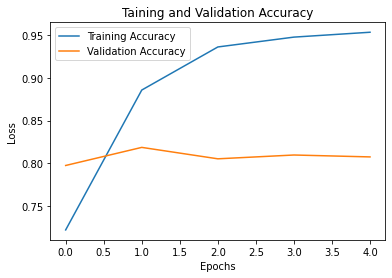

In [7]:
plt.plot(h.history['accuracy'],label='Training Accuracy')
plt.plot(h.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Taining and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Training and Validation Loss

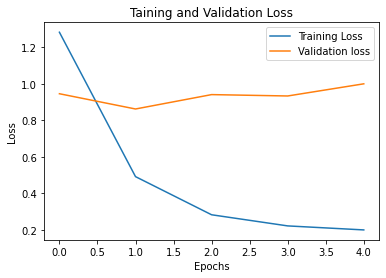

In [8]:
plt.plot(h.history['loss'],label='Training Loss')
plt.plot(h.history['val_loss'],label = 'Validation loss')
plt.title('Taining and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##